In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def build_enhanced_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # Input layer
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))  # Output layer with no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_enhanced_model()

In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 580.3887 - mae: 22.0815 - val_loss: 395.7347 - val_mae: 18.2487
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 377.9048 - mae: 17.5634 - val_loss: 223.3279 - val_mae: 13.2848
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 203.2676 - mae: 12.1096 - val_loss: 92.7626 - val_mae: 7.7255
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.4124 - mae: 7.3843 - val_loss: 40.8841 - val_mae: 4.6257
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.8150 - mae: 5.5176 - val_loss: 27.2629 - val_mae: 3.7053
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.5546 - mae: 5.3161 - val_loss: 25.3221 - val_mae: 3.5093
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.5735 - mae: 4.6852 - val_loss: 25.2980 - val_mae: 3.4763
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.5047 - mae: 4.5055 - val_loss: 23.1871 - val_mae: 3.3309
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━

In [5]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test data: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7856 - mae: 2.0710 
Mean Absolute Error on test data: 2.2564613819122314


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


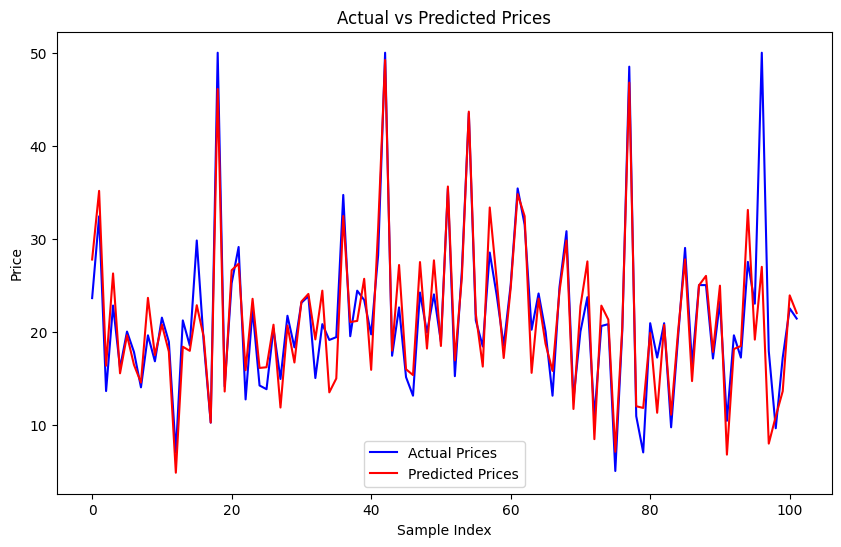

In [6]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()